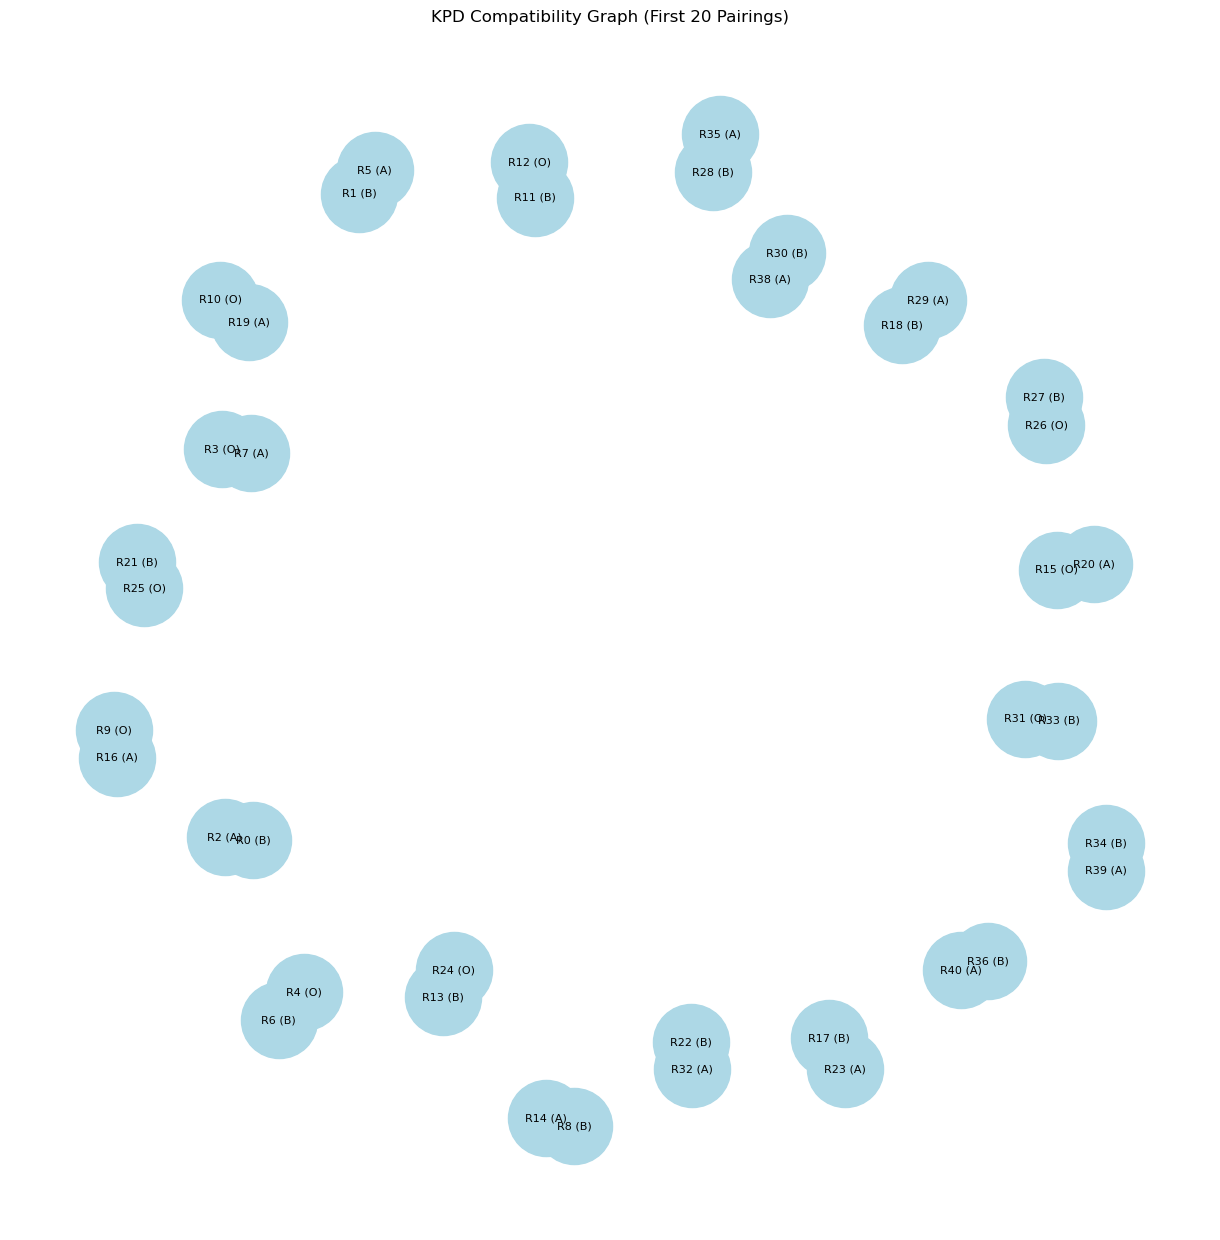

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-12500H, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 741 rows, 20 columns and 40 nonzeros
Model fingerprint: 0xc7159825
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 20.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 20 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+01, best bound 2.000000000000e+01, gap 0.0000%
Optimal solution found!
Matching: Pair 0 (Recipient: B) ↔ Pair 2 (Recipient: A)
Matching: Pair 1 (Recipient: B) ↔ Pair 5 (Recipient: A)
Ma

In [7]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum

# Compatibility function
def compatibility(dbtype, rbtype):
    comp_matrix = {
        "A": ["A", "AB"],
        "B": ["B", "AB"],
        "AB": ["AB"],
        "O": ["A", "B", "AB", "O"]
    }
    return rbtype in comp_matrix.get(dbtype, [])

# Dataset
def load_data(file):
    with open(file, 'r') as file:
        data = json.load(file)
    return data

# Create a compatibility graph
def Comp_graph(data, max_edges=20):
    edges = []
    edge_count = 0
    added_nodes = set()
    for i, recipient1 in enumerate(data):
        for j, recipient2 in enumerate(data):
            if i != j and i not in added_nodes and j not in added_nodes:
                # Compatibility check
                for donor1 in recipient1["Donor"]:
                    if compatibility(donor1, recipient2["Recipient"]):
                        edges.append((i, j))  # i and j represent the two recipient indices
                        edge_count += 1
                        added_nodes.update([i, j])
                        if edge_count >= max_edges:
                            return edges  # Return the first 20 edges
                        break
    return edges

# Optimization model
def kpd(file):
    data = load_data(file)
    edges = Comp_graph(data)
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=False, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    labels = {i: f"R{i} ({data[i]['Recipient']})" for i in range(len(data)) if i in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
    plt.title('KPD Compatibility Graph (First 20 Pairings)')
    plt.show()

    #Optimization Model solve
    model = Model("KPD Matching")
    x = model.addVars(edges, vtype=GRB.BINARY, name="x")
    model.setObjective(quicksum(x[e] for e in edges), GRB.MAXIMIZE)
    for i in range(len(data)):
        model.addConstr(quicksum(x[e] for e in edges if e[0] == i or e[1] == i) <= 1, name=f"node_{i}_constraint")
    model.optimize()

    if model.status == GRB.OPTIMAL:
        print("Optimal solution found!")
        for e in edges:
            if x[e].x > 0.5:
                print(f"Matching: Pair {e[0]} (Recipient: {data[e[0]]['Recipient']}) ↔ "
                      f"Pair {e[1]} (Recipient: {data[e[1]]['Recipient']})")
    else:
        print("No optimal solution found.")

# File path
file = "To_Be_Determined.json"  
kpd(file)

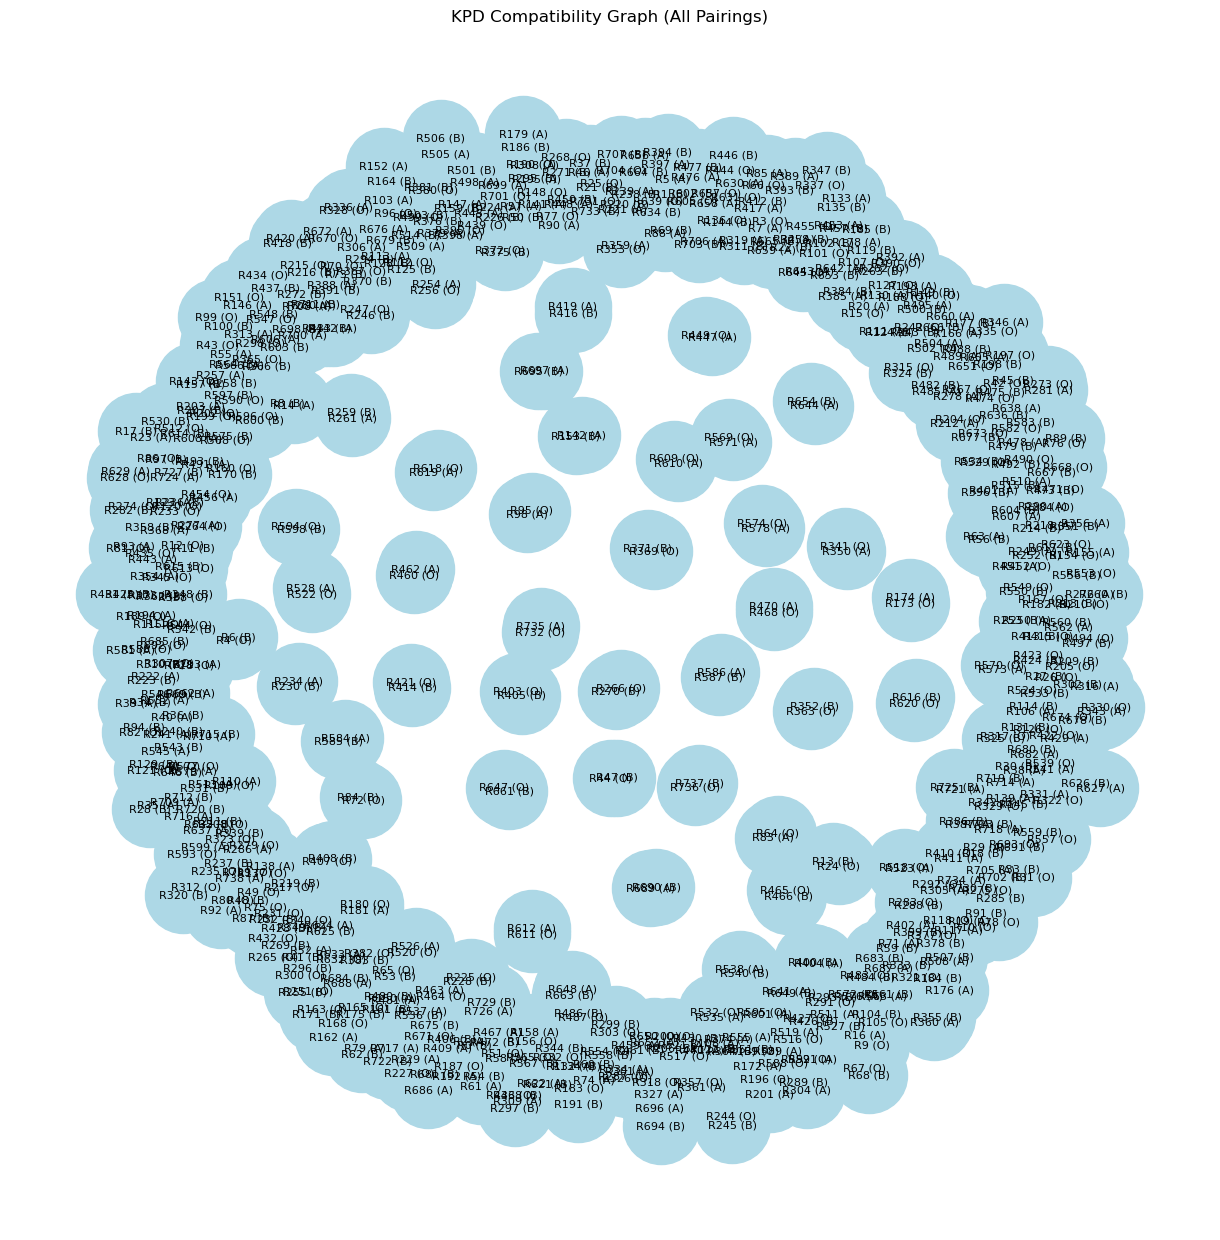

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-12500H, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 741 rows, 367 columns and 734 nonzeros
Model fingerprint: 0x4d6e4f44
Variable types: 0 continuous, 367 integer (367 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 367.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 367 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.670000000000e+02, best bound 3.670000000000e+02, gap 0.0000%
Optimal solution found!
Matching: Pair 0 (Recipient: B) ↔ Pair 2 (Recipient: A)
Matching: Pair 1 (Recipient: B) ↔ Pair 5 (Recipient:

In [8]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum

# Compatibility function
def compatibility(dbtype, rbtype):
    comp_matrix = {
        "A": ["A", "AB"],
        "B": ["B", "AB"],
        "AB": ["AB"],
        "O": ["A", "B", "AB", "O"]
    }
    return rbtype in comp_matrix.get(dbtype, [])

# Dataset
def load_data(file):
    with open(file, 'r') as file:
        data = json.load(file)
    return data

# Create a compatibility graph
def Comp_graph(data):
    edges = []
    added_nodes = set()
    for i, recipient1 in enumerate(data):
        for j, recipient2 in enumerate(data):
            if i != j and i not in added_nodes and j not in added_nodes:
                # Compatibility check
                for donor1 in recipient1["Donor"]:
                    if compatibility(donor1, recipient2["Recipient"]):
                        edges.append((i, j))  # i and j represent the two recipient indices
                        added_nodes.update([i, j])
                        break
    return edges

# Optimization model
def kpd(file):
    data = load_data(file)
    edges = Comp_graph(data)
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=False, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    labels = {i: f"R{i} ({data[i]['Recipient']})" for i in range(len(data)) if i in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
    plt.title('KPD Compatibility Graph (All Pairings)')
    plt.show()

    #Optimization Model Solve
    model = Model("KPD Matching")
    x = model.addVars(edges, vtype=GRB.BINARY, name="x")
    model.setObjective(quicksum(x[e] for e in edges), GRB.MAXIMIZE)
    for i in range(len(data)):
        model.addConstr(quicksum(x[e] for e in edges if e[0] == i or e[1] == i) <= 1, name=f"node_{i}_constraint")
    model.optimize()

    if model.status == GRB.OPTIMAL:
        print("Optimal solution found!")
        for e in edges:
            if x[e].x > 0.5:
                print(f"Matching: Pair {e[0]} (Recipient: {data[e[0]]['Recipient']}) ↔ "
                      f"Pair {e[1]} (Recipient: {data[e[1]]['Recipient']})")
    else:
        print("No optimal solution found.")

# File path
file = "To_Be_Determined.json"  
kpd(file)